In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
# 1. Load dataset
wine = load_wine()
X, y = wine.data, wine.target
feature_names = wine.feature_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)


In [3]:
# 2. Train Random Forest
rf = RandomForestClassifier(
    n_estimators=200, random_state=0
)
rf.fit(X_train, y_train)

print("Model Accuracy:", rf.score(X_test, y_test))

Model Accuracy: 0.9814814814814815


In [4]:
# 3. Get feature importances
importances = rf.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]


In [5]:
# 4. Display as table
print("Feature ranking:")
for i in range(len(feature_names)):
    print(f"{i+1}. {feature_names[indices[i]]} ({importances[indices[i]]:.3f})")

Feature ranking:
1. color_intensity (0.192)
2. proline (0.167)
3. flavanoids (0.144)
4. od280/od315_of_diluted_wines (0.130)
5. alcohol (0.098)
6. hue (0.073)
7. total_phenols (0.065)
8. alcalinity_of_ash (0.031)
9. malic_acid (0.024)
10. magnesium (0.022)
11. proanthocyanins (0.020)
12. nonflavanoid_phenols (0.018)
13. ash (0.017)


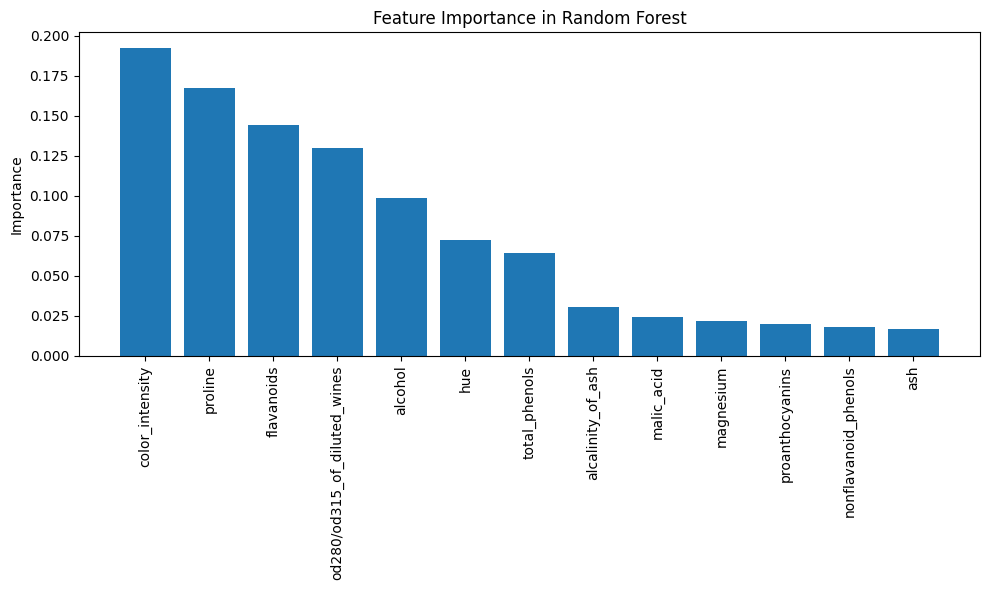

In [6]:
# 5. Visualization
plt.figure(figsize=(10,6))
plt.bar(range(len(feature_names)), importances[indices], align="center")
plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=90)
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.tight_layout()
plt.show()